# K Means Clustering

Chapter 10 of ISL

K Means Clustering is an unsupervised learning algorithm that will attempt to group similar clusters together in your data.

So that does a typical clustering problem look like?
- Cluster Similar Documents
- Cluster Customers based on Features
- Market Segmentation
- Identify similar physical groups

The overall goal is to divide data into distinct groups such that observations within each group are similar

<img src = "https://i.stack.imgur.com/cIDB3.png">

### The K Means Algorithm
- Chooses a number of Clusters "K"
- Randomly assigns each point to a cluster
- Until clusters stop changing, repeat the following:
    - For each cluster, compute the cluster centroid by taking the mean vector of points in the cluster
    - Assign each data point to the cluster for which the centroid is the closest
    
<img src = "http://www.learnbymarketing.com/wp-content/uploads/2015/01/method-k-means-steps-example.png">

### Choosing a K Value
There is no easy answer for choosing a "best" K value

One way is the elbow method

Compute the sum of squared error (SSE) for some values of k (for example, 2, 4, 6, 8, etc.)

The SSE is defined as the sum of the squared distance between each member of the cluster and its centroid.

If you plot k against SSE, you will see that the error decreases as k gets larger. this is because when the number of clusters increases, they should be smaller, so distortion is also smaller.

The idea of the elbow method is to choose a k at which the SSE decreases abruptly

This produces an "elbow effect" in the graph.

<img src = "https://pythonprogramminglanguage.com/wp-content/uploads/2017/07/elbow-method.png">

# K Means Clustering in R

In [12]:
library(ISLR)
library(dplyr)
library(ggplot2)

In [13]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


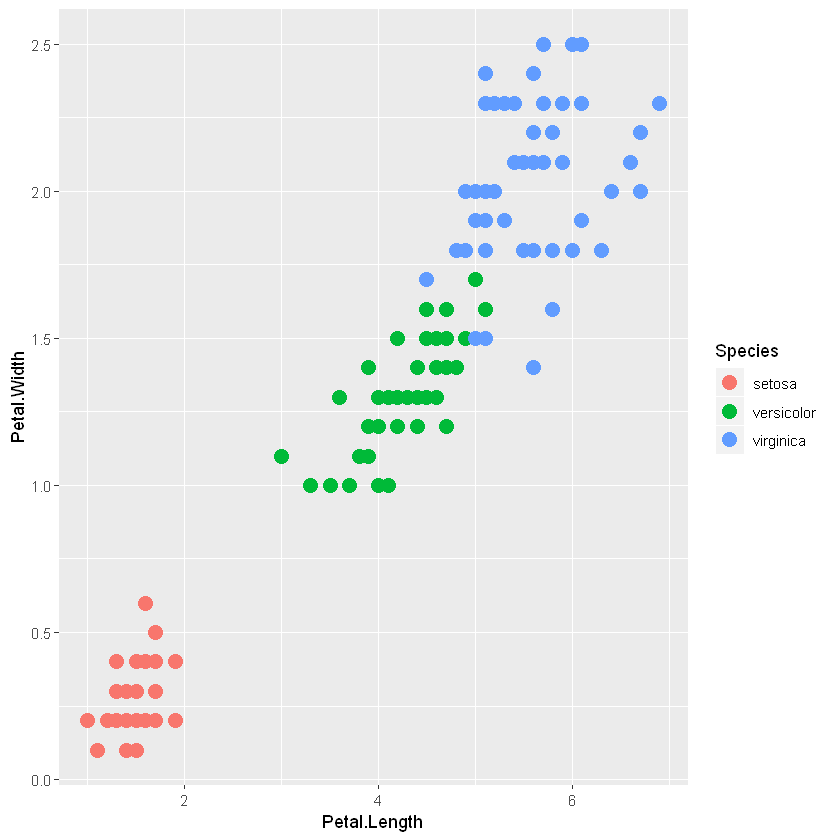

In [15]:
ggplot(data = iris, aes(x = Petal.Length, y = Petal.Width, color = Species)) + 
geom_point(size = 4)

In [16]:
df <- select(iris, -Species)
head(df)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [23]:
set.seed(101)
irisCluster <- kmeans(df, 3 , nstart = 20)

In [24]:
print(irisCluster)

K-means clustering with 3 clusters of sizes 38, 62, 50

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.850000    3.073684     5.742105    2.071053
2     5.901613    2.748387     4.393548    1.433871
3     5.006000    3.428000     1.462000    0.246000

Clustering vector:
  [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
[112] 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
[149] 1 2

Within cluster sum of squares by cluster:
[1] 23.87947 39.82097 15.15100
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [25]:
table(irisCluster$cluster, iris$Species)

   
    setosa versicolor virginica
  1      0          2        36
  2      0         48        14
  3     50          0         0

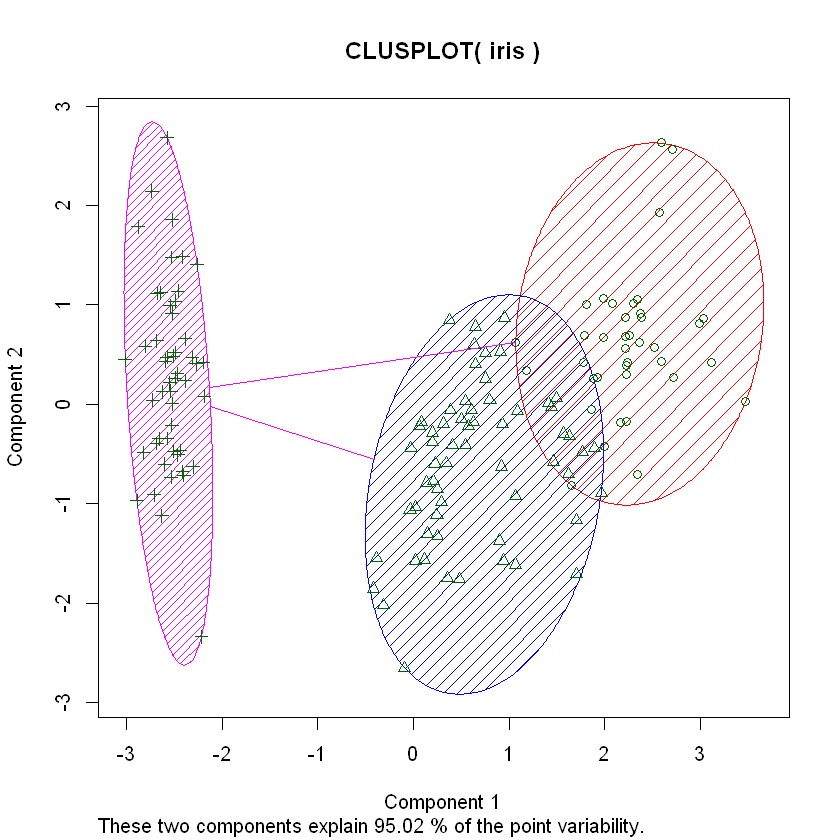

In [27]:
library(cluster)
clusplot(iris, irisCluster$cluster, color = TRUE, shade = TRUE)